In [1]:
import os, shutil

In [2]:
ori_dataset_dir = './data/train'
base_dir = './data/cats_and_dogs_small/'

In [3]:
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

print(train_dir, val_dir, test_dir, sep='\n')

./data/cats_and_dogs_small/train
./data/cats_and_dogs_small/validation
./data/cats_and_dogs_small/test


In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)

val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(ori_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [1]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58889256/58889256 [==============================] - 1s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print('data directory: ', train_dir, validation_dir, test_dir, sep="\n")


datagen = ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))

    print('feature, label: ', features.shape, labels.shape)
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=BATCH_SIZE,
        class_mode='binary'
    )

    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        print('extracted feature: ', type(features_batch), features_batch.shape)

        features[i * BATCH_SIZE:(i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE:(i + 1) * BATCH_SIZE] = labels_batch

        i += 1
        if i * BATCH_SIZE >= sample_count:
            break

    return features, labels

data directory: 
./data/cats_and_dogs_small\train
./data/cats_and_dogs_small\validation
./data/cats_and_dogs_small\test


In [7]:
t_features, t_labels = extract_features(train_dir, 100)
print(t_features.shape, t_labels.shape)

feature, label:  (100, 4, 4, 512) (100,)
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 14ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 12ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 13ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 13ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 14ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
(100, 4, 4, 512) (100,)


In [8]:
%%time

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

feature, label:  (2000, 4, 4, 512) (2000,)
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 12ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 12ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 12ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 13ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 14ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 12ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 16ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============================] - 0s 13ms/step
extracted feature:  <class 'numpy.ndarray'> (20, 4, 4, 512)
1/1 [==============

In [9]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [10]:
from tensorflow.keras import models, layers, optimizers

In [12]:
%%time

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=BATCH_SIZE,
    validation_data=(validation_features, validation_labels)
)

Epoch 1/30
100/100 [==============================] - 3s 24ms/step - loss: 0.6233 - acc: 0.6420 - val_loss: 0.4495 - val_acc: 0.8380
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4313 - acc: 0.8030 - val_loss: 0.3683 - val_acc: 0.8600
Epoch 3/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3606 - acc: 0.8505 - val_loss: 0.3222 - val_acc: 0.8740
Epoch 4/30
100/100 [==============================] - 0s 2ms/step - loss: 0.3156 - acc: 0.8680 - val_loss: 0.2957 - val_acc: 0.8840
Epoch 5/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2924 - acc: 0.8825 - val_loss: 0.2793 - val_acc: 0.8840
Epoch 6/30
100/100 [==============================] - 0s 2ms/step - loss: 0.2637 - acc: 0.8945 - val_loss: 0.2766 - val_acc: 0.8870
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2504 - acc: 0.9040 - val_loss: 0.2610 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 0s 2ms/step - loss: 0

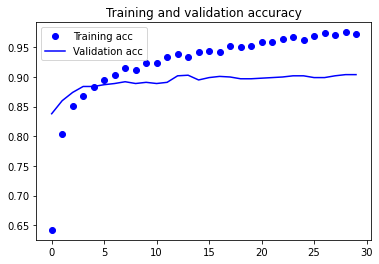

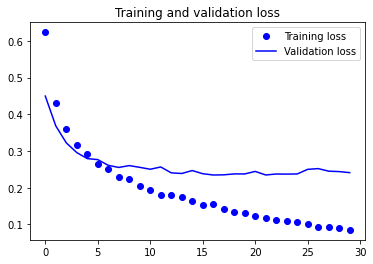

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()